In [1]:
from astropy.io import fits, ascii
from astropy.table import Table, vstack
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from mpl_scatter_density import ScatterDensityArtist
import matplotlib.ticker as ticker
plt.rcParams.update({
    "font.family": "Times New Roman",  
    "text.usetex": True,
    'axes.labelsize':22,
    'xtick.labelsize':22,
    'ytick.labelsize':22,
    'figure.dpi':300})

from matplotlib.patches import Polygon
plt.rcParams["text.antialiased"] = True

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
data=fits.open('ms_wd_original_data_from_Gaia_query.fits',memmap=True) 

data=Table(data[1].data).to_pandas()

data.dropna(inplace=True)

bprp=data['bp_rp'].values
G_abs=data['phot_g_mean_mag'].values + 5 + 5*np.log10(data['parallax'].values/1000)

target=pd.read_csv("ms_wd_topcat_selected_targets.csv")

bprp_target=target['bp_rp'].values
G_abs_target=target['phot_g_mean_mag'].values + 5 + 5*np.log10(target['parallax'].values/1000)

In [3]:
G_abs.shape

(2077704,)

/Users/princy/opt/anaconda3/lib/python3.9/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/Users/princy/opt/anaconda3/lib/python3.9/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


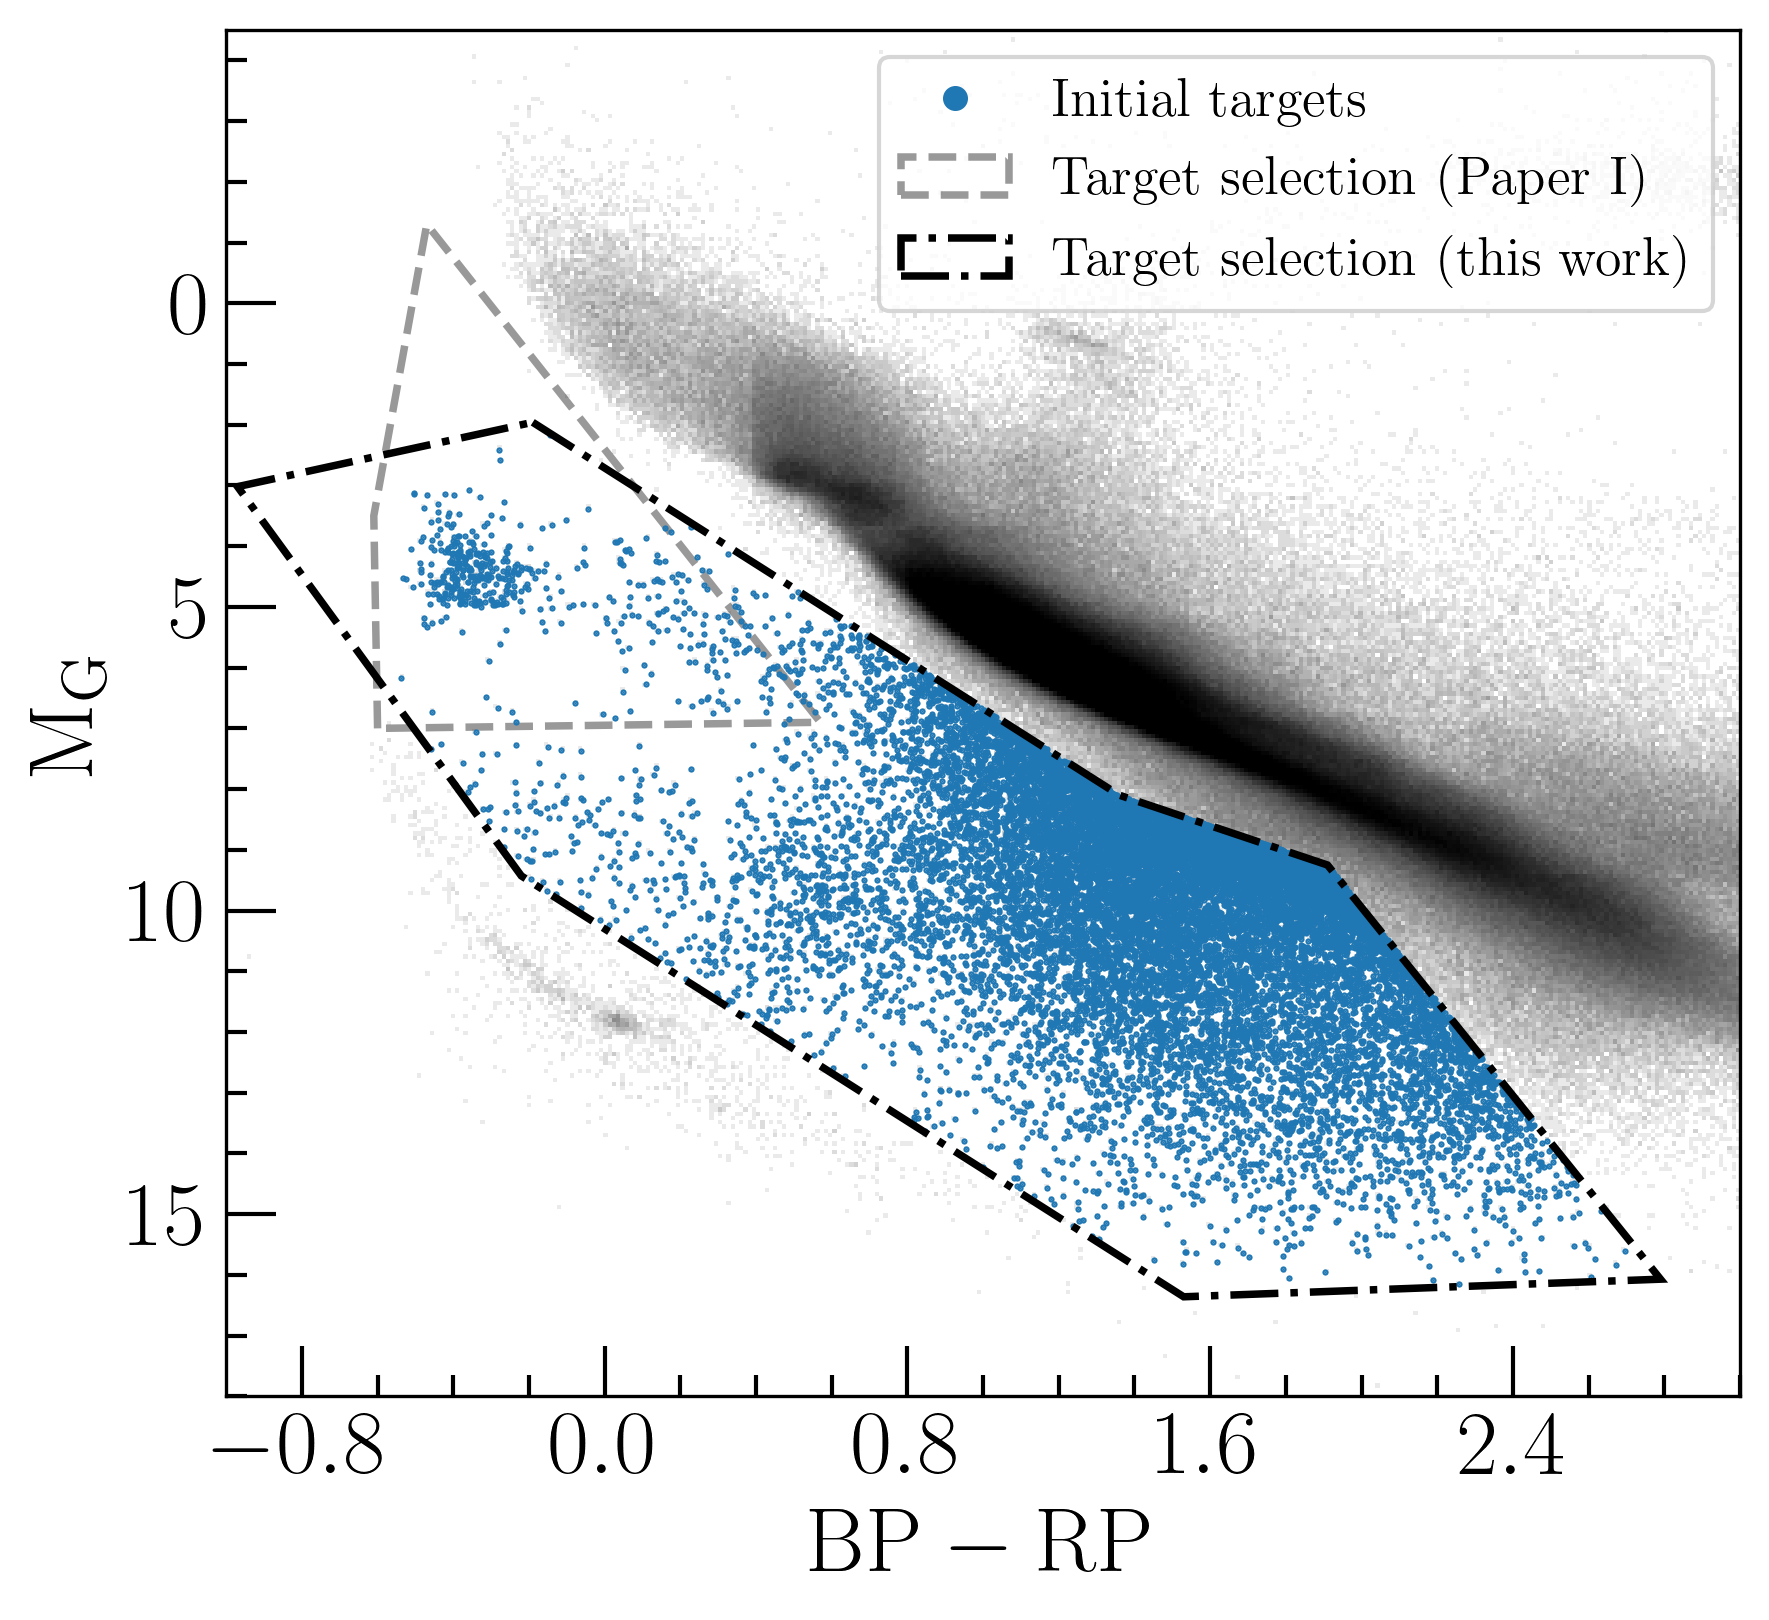

In [24]:
fig, ax = plt.subplots(figsize=(6, 5.5), dpi=300, subplot_kw={'projection': 'scatter_density'})

ax.set_facecolor("white")


norm = ImageNormalize(vmin=0., vmax=500, stretch=LogStretch())


density = ax.scatter_density(bprp, G_abs, norm=norm, cmap="Greys", downres_factor=1)

# ax.plot(bprp[0], G_abs[0],'.',color='grey', ms=0.5,label='Gaia DR3 sources')
ax.plot(bprp_target, G_abs_target,'o', ms=0.5,label='Initial targets')
verts_2 = [
    (-0.6, 7),
    (-0.61, 3.5),
    (-0.47, -1.3),
    (0.57,6.9)
]
poly2 = Polygon(verts_2, closed=True, fill=False, edgecolor='black', linewidth=1.8,alpha=0.4,linestyle='--',label='Target selection (Paper I)')
plt.gca().add_patch(poly2)


verts = [
    (-0.19, 1.96),
    (1.36, 8.10),
    (1.91, 9.25),
    (2.79, 16.07),
    (1.53, 16.36),
    (-0.22, 9.43),
    (-0.97, 3.02)
]

verts.append(verts[0])
poly = Polygon(verts, closed=True, fill=False, edgecolor='black', linewidth=1.8,alpha=1,linestyle='-.',label='Target selection (this work)',zorder=2)
plt.gca().add_patch(poly)



ax.set_xlabel(r"$B_{p} - R_{p}$ \textbf{(mag)}")  
ax.set_ylabel(r"$M_{G}$ \textbf{(mag)}")


ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
ax.yaxis.set_major_locator(ticker.MaxNLocator(5))



plt.minorticks_on()
plt.tick_params('both', length=12, width=1., which='major', direction='in')	
plt.tick_params('both', length=5, width=1, which='minor', direction='in')

ax.set_ylim([18,-4.5])
ax.set_xlim([-1,3])
ax.set_xlabel(r'$\rm BP-RP$')
ax.set_ylabel(r'$\rm M_G$')

ax.legend(fontsize=13,markerscale=10)

plt.tight_layout()
plt.savefig('CMD_targets_ms_wd_paper.pdf',format='pdf',bbox_inches="tight")



In [4]:
data_targets=pd.read_csv("/Users/princy/Downloads/clustering_final_results_51features.csv")


bprp_target=data_targets['bp_rp'].values
G_abs_target=data_targets['phot_g_mean_mag'].values + 5 + 5*np.log10(data_targets['parallax'].values/1000)




In [5]:
data_targets

,source_id,phot_variable_flag,in_andromeda_survey,num_obs_common_all_bands,num_obs_g_fov,gls_freq_g_fov,gls_freq_ampl_g_fov,gls_freq_sde_g_fov,gls_freq_fap_g_fov,nhm_fund_freq_g_fov,...,SDB,SOLAR_LIKE,WD,YSO,tsne1_70,tsne2_70,label_gm_tsne70,label_name_gm_tsne70,Cluster Name,log_fap
0,5937083204838582784,VARIABLE,False,35,51,0.324646,0.481452,10.800096,1.601956e-02,0.324541,...,False,False,False,False,28.779166,-2.956139,9,EB2,EB2,-5.424636
1,5912901443721234304,VARIABLE,False,81,90,17.400398,0.843740,20.189611,3.413430e-30,17.400357,...,False,False,False,False,24.500066,-50.556233,7,EB1,EB1,-10.000000
2,5912575537299009536,VARIABLE,False,45,59,16.044479,0.287585,7.744163,1.000000e+00,16.044464,...,NaN,NaN,NaN,NaN,-23.731444,56.322079,6,ROT1,ROT1,-0.539842
3,5912305160517496064,VARIABLE,False,52,69,0.018562,0.559541,15.173192,2.944508e-07,0.018617,...,False,True,False,False,-57.114301,8.232096,8,ROT2,ROT2,-6.849625
4,5912467411497513728,VARIABLE,False,34,53,13.008608,0.420582,10.237863,1.415733e-01,13.008588,...,False,False,False,False,-4.160074,12.087093,0,STS1,STS1,-1.064555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13400,6030019218988738304,VARIABLE,False,40,45,20.323631,0.321539,7.170850,1.000000e+00,20.323640,...,NaN,NaN,NaN,NaN,2.948351,78.304172,2,GAPS,GAPS,-0.453081
13401,5961424747339028864,VARIABLE,False,44,50,5.530439,0.712264,12.056073,4.233486e-08,5.530392,...,False,False,False,False,35.168086,-16.039049,9,EB2,EB2,-10.000000
13402,5961493226309041152,VARIABLE,False,24,35,0.018786,0.822440,12.223370,2.325386e-07,0.018748,...,False,False,False,False,38.871850,0.620730,9,EB2,EB2,-6.432682
13403,5961557479053667712,VARIABLE,False,44,55,7.414952,0.901565,17.175503,2.759584e-21,7.414945,...,False,False,False,False,29.359221,-32.761752,7,EB1,EB1,-10.000000


In [26]:
potential_rrlyae=pd.read_csv("/Users/princy/Radboud/paper3_data/Gaia_plots/Potential_RRLyrae/Gaia_id.txt",header=None,)

In [27]:
potential_rrlyae.columns=['source_id']
criteria=pd.read_csv("rrlyrae_criteria.csv")
clean_=pd.merge(data_targets,criteria[criteria['clean']==True],on="source_id")
clean=pd.merge(clean_,potential_rrlyae,on="source_id")
potential_rrlyrae_data=pd.merge(data_targets,potential_rrlyae,on="source_id")

bprp_rr=potential_rrlyrae_data['bp_rp'].values
G_abs_rr=potential_rrlyrae_data['G_abs'].values

bprp_clean_rr=clean['bp_rp'].values
G_abs_clean_rr=clean['G_abs'].values

In [1]:
# np.percentile(potential_rrlyrae_data['amp_G'],[25,75])

In [2]:
# criteria[criteria['clean']==False]
# list_potrrlyrae=list(potential_rrlyae['source_id'].values)
# list_all_noncleanlyrae=list(criteria['source_id'][criteria['clean']==False].values)
# for l in list_all_noncleanlyrae:
#     if l not in list_potrrlyrae:
#         print(l)

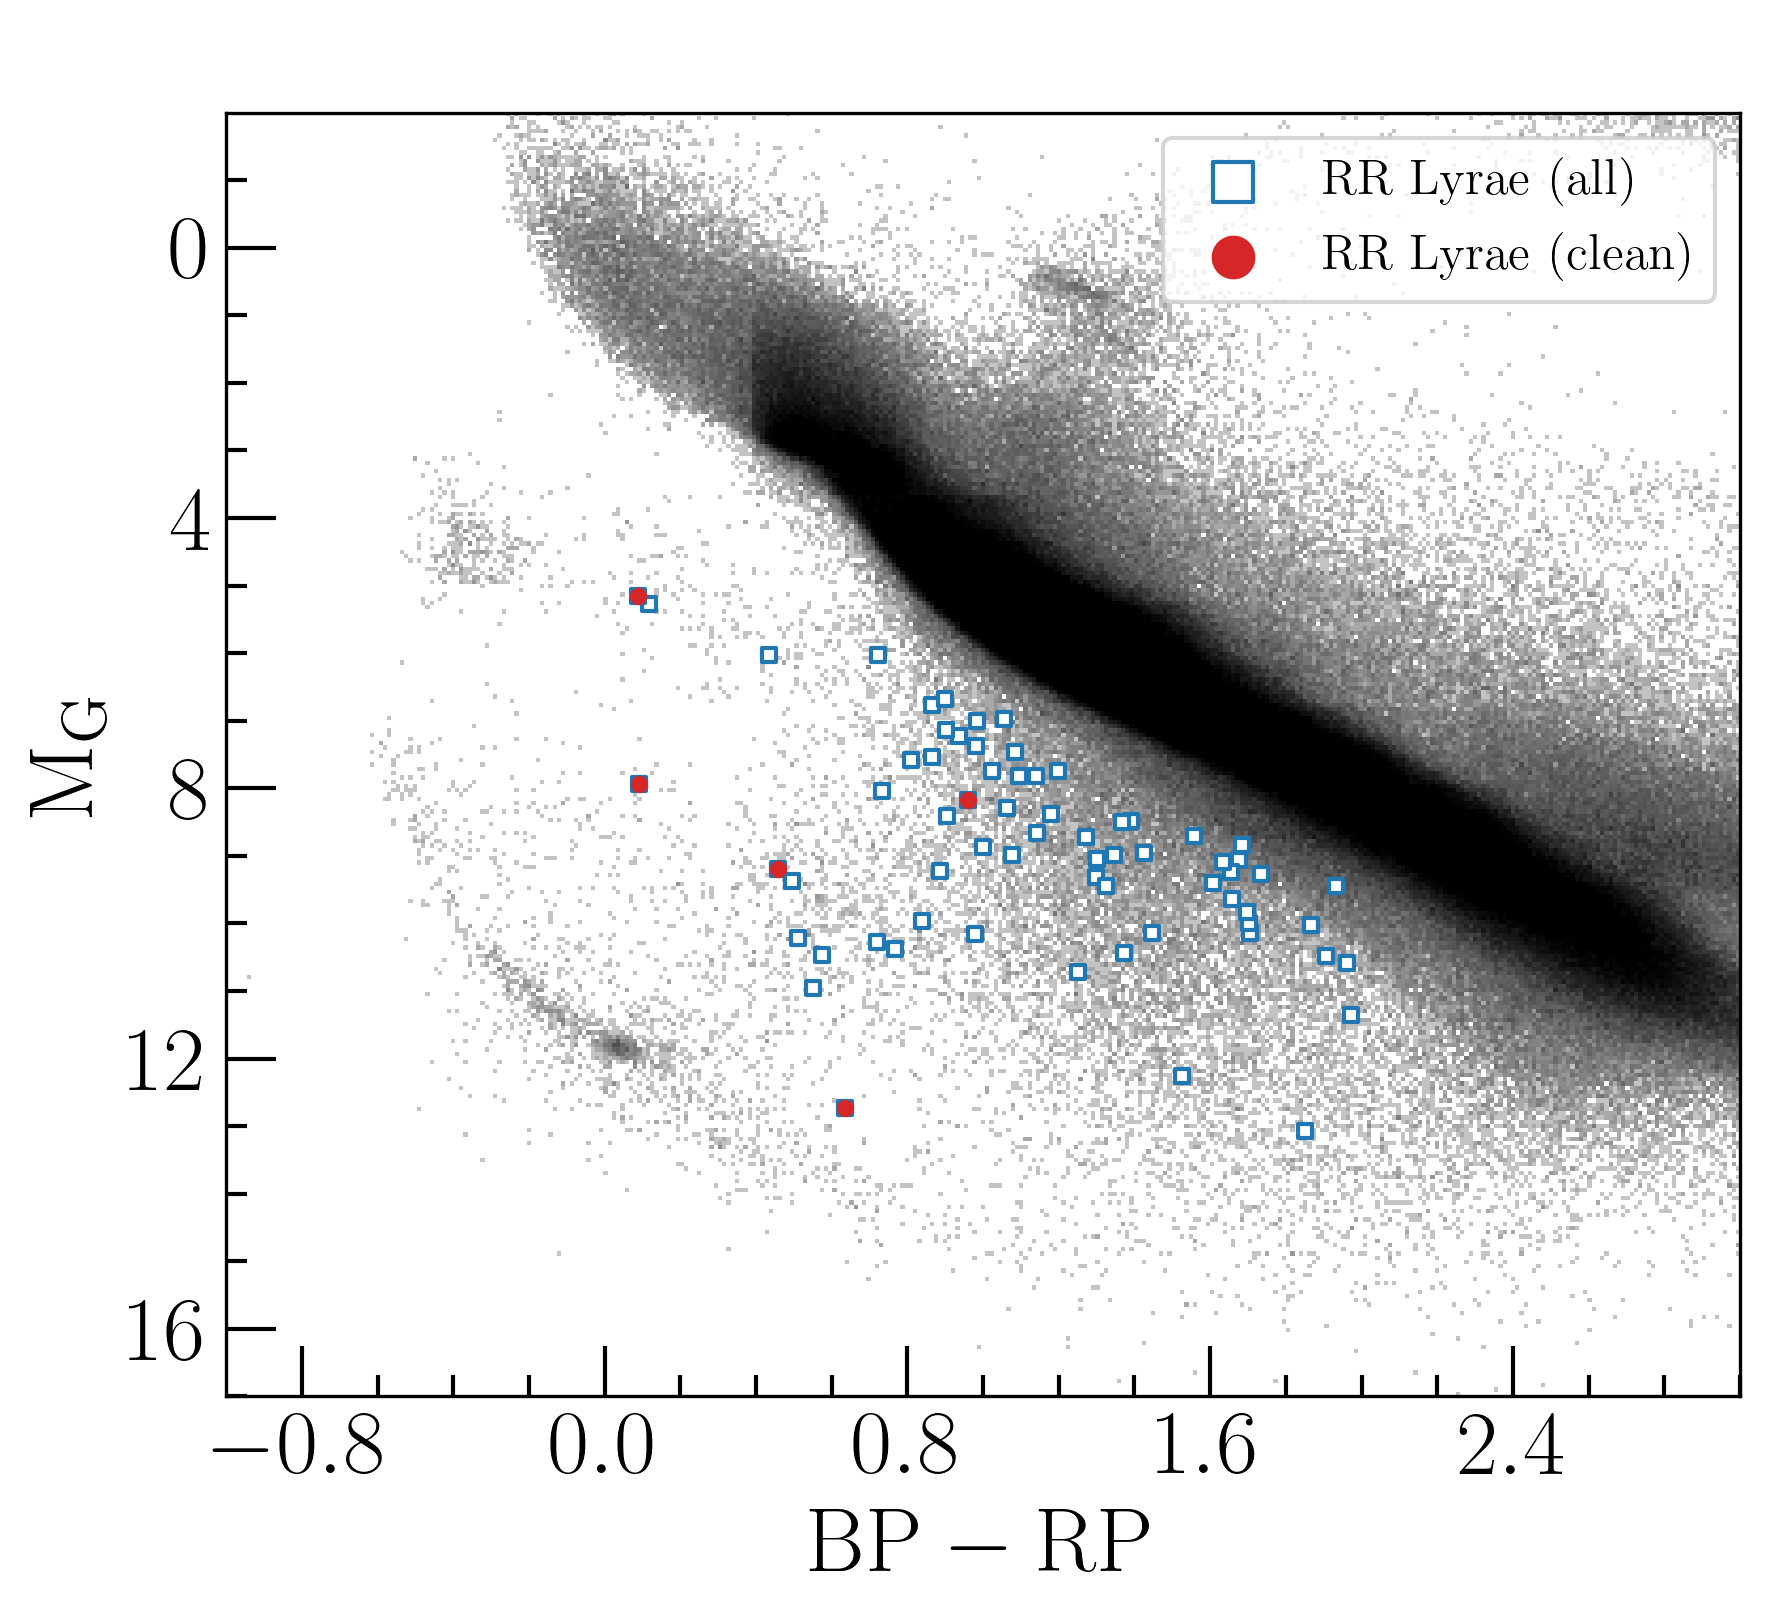

In [69]:
fig, ax = plt.subplots(figsize=(6, 5.5), dpi=300, subplot_kw={'projection': 'scatter_density'})

ax.set_facecolor("white")


norm = ImageNormalize(vmin=0., vmax=100, stretch=LogStretch())

ax.set_title(" ",fontsize=20)

density = ax.scatter_density(bprp, G_abs, norm=norm, cmap="Greys", downres_factor=1)

plt.scatter(bprp_rr,G_abs_rr,s=10,color="C0",marker='s',facecolor='white',label='RR Lyrae (all)')
plt.scatter(bprp_clean_rr,G_abs_clean_rr, s=10,color='C3',marker='o',label="RR Lyrae (clean)")


ax.set_xlabel(r"$B_{p} - R_{p}$ \textbf{(mag)}")  
ax.set_ylabel(r"$M_{G}$ \textbf{(mag)}")


ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
ax.yaxis.set_major_locator(ticker.MaxNLocator(5))



plt.minorticks_on()
plt.tick_params('both', length=12, width=1., which='major', direction='in')	
plt.tick_params('both', length=5, width=1, which='minor', direction='in')

ax.set_ylim([17,-2])
ax.set_xlim([-1.,3])
ax.set_xlabel(r'$\rm BP-RP$')
ax.set_ylabel(r'$\rm M_G$')

ax.legend(fontsize=12,markerscale=3)

plt.tight_layout()
plt.savefig('CMD_Gaia_rrlyrae.pdf',format='pdf',bbox_inches="tight")



In [28]:
eb1=data_targets[(data_targets['label_name_gm_tsne70']=="EB1")&(data_targets['in_vari_eclipsing_binary']==True)]
eb2=data_targets[(data_targets['label_name_gm_tsne70']=="EB2")&(data_targets['in_vari_eclipsing_binary']==True)]
eb3=data_targets[(data_targets['label_name_gm_tsne70']=="EB3")&(data_targets['in_vari_eclipsing_binary']==True)]
ECL=data_targets[data_targets['in_vari_eclipsing_binary']==True]

rot1=data_targets[(data_targets['label_name_gm_tsne70']=="ROT1")]
rot2=data_targets[(data_targets['label_name_gm_tsne70']=="ROT2")]

rot=data_targets[data_targets['in_vari_rotation_modulation']==True]
hsd=data_targets[(data_targets['C0']==True)|(data_targets['C1']==True)]
CVs=data_targets[(data_targets['CVs']==True)]
WD=data_targets[(data_targets['WD_simbad']==True)]



In [37]:
CVs_lit

,source_id_1,potential_var,EB2,EB1,STS2,ROT1,ROT2,STS1,GAPS,EB3,...,YSO,tsne1_70,tsne2_70,label_gm_tsne70,source_id_2,RAJ2000,DEJ2000,Reference_2,Type_2,Porb_2
0,462713869228951424,False,False,False,False,False,False,False,False,False,...,False,62.799711,-18.704047,5,462713869228951424,52.066375,61.421472,2023AJ....165..163C,non-mCVs,NaN
1,2203373473312011008,False,False,False,False,False,False,False,False,False,...,False,78.740203,-20.131904,5,2203373473312011008,330.987500,61.538806,2023AJ....165..163C,non-mCVs,0.131440
2,1996248233085177472,False,False,False,False,False,False,False,False,False,...,False,61.270267,-33.964069,5,1996248233085177472,345.944417,53.287444,2023AJ....165..163C,non-mCVs,0.149600
3,423864245075612416,False,False,False,False,False,False,False,False,False,...,False,86.335656,-1.583666,5,423864245075612416,12.256208,56.878778,2023AJ....165..163C,non-mCVs,0.089020
4,358062837831128064,False,False,False,False,False,False,False,False,False,...,False,85.389772,-14.366722,5,358062837831128064,31.992875,48.575389,2023AJ....165..163C,non-mCVs,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,6253906178972377600,False,False,False,False,False,False,False,False,False,...,False,85.724490,-6.655513,5,6253906178972377600,234.369708,-20.051444,2023AJ....165..163C,non-mCVs,NaN
548,545338083544363392,False,False,False,False,False,False,False,False,False,...,False,84.066862,-14.535337,5,545338083544363392,36.597417,71.308750,2023AJ....165..163C,non-mCVs,0.165200
549,1872069664728668288,False,False,False,False,False,False,False,False,False,...,False,68.522954,-24.029824,5,1872069664728668288,317.141792,39.093139,2023AJ....165..163C,non-mCVs,0.164052
550,1796893134146598144,False,False,False,False,False,False,False,False,False,...,False,57.339875,-14.137062,5,1796893134146598144,328.740417,26.686944,2023AJ....165..163C,non-mCVs,0.058590


In [29]:
sdb_sub=pd.read_csv("/Users/princy/Downloads/hsd_tsne_sub_clusters.csv")
CVs_lit=pd.read_csv("/Users/princy/Radboud/paper3_data/CVs_cluster_with_known_CVs.csv")


sdb_sub0=sdb_sub[sdb_sub['HSD Sub Cluster']==0]
sdb_sub1=sdb_sub[sdb_sub['HSD Sub Cluster']==1]

known_hsd_culpan=data_targets[data_targets['hsd']==True]

CVs_DN=CVs_lit[CVs_lit['Type_2']=="DN"]
CVs_mcvs=CVs_lit[CVs_lit['Type_2']=="mCV"]
CVs_nonmcvs=CVs_lit[CVs_lit['Type_2']=="non-mCVs"]

In [30]:
color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

/Users/princy/opt/anaconda3/lib/python3.9/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/Users/princy/opt/anaconda3/lib/python3.9/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


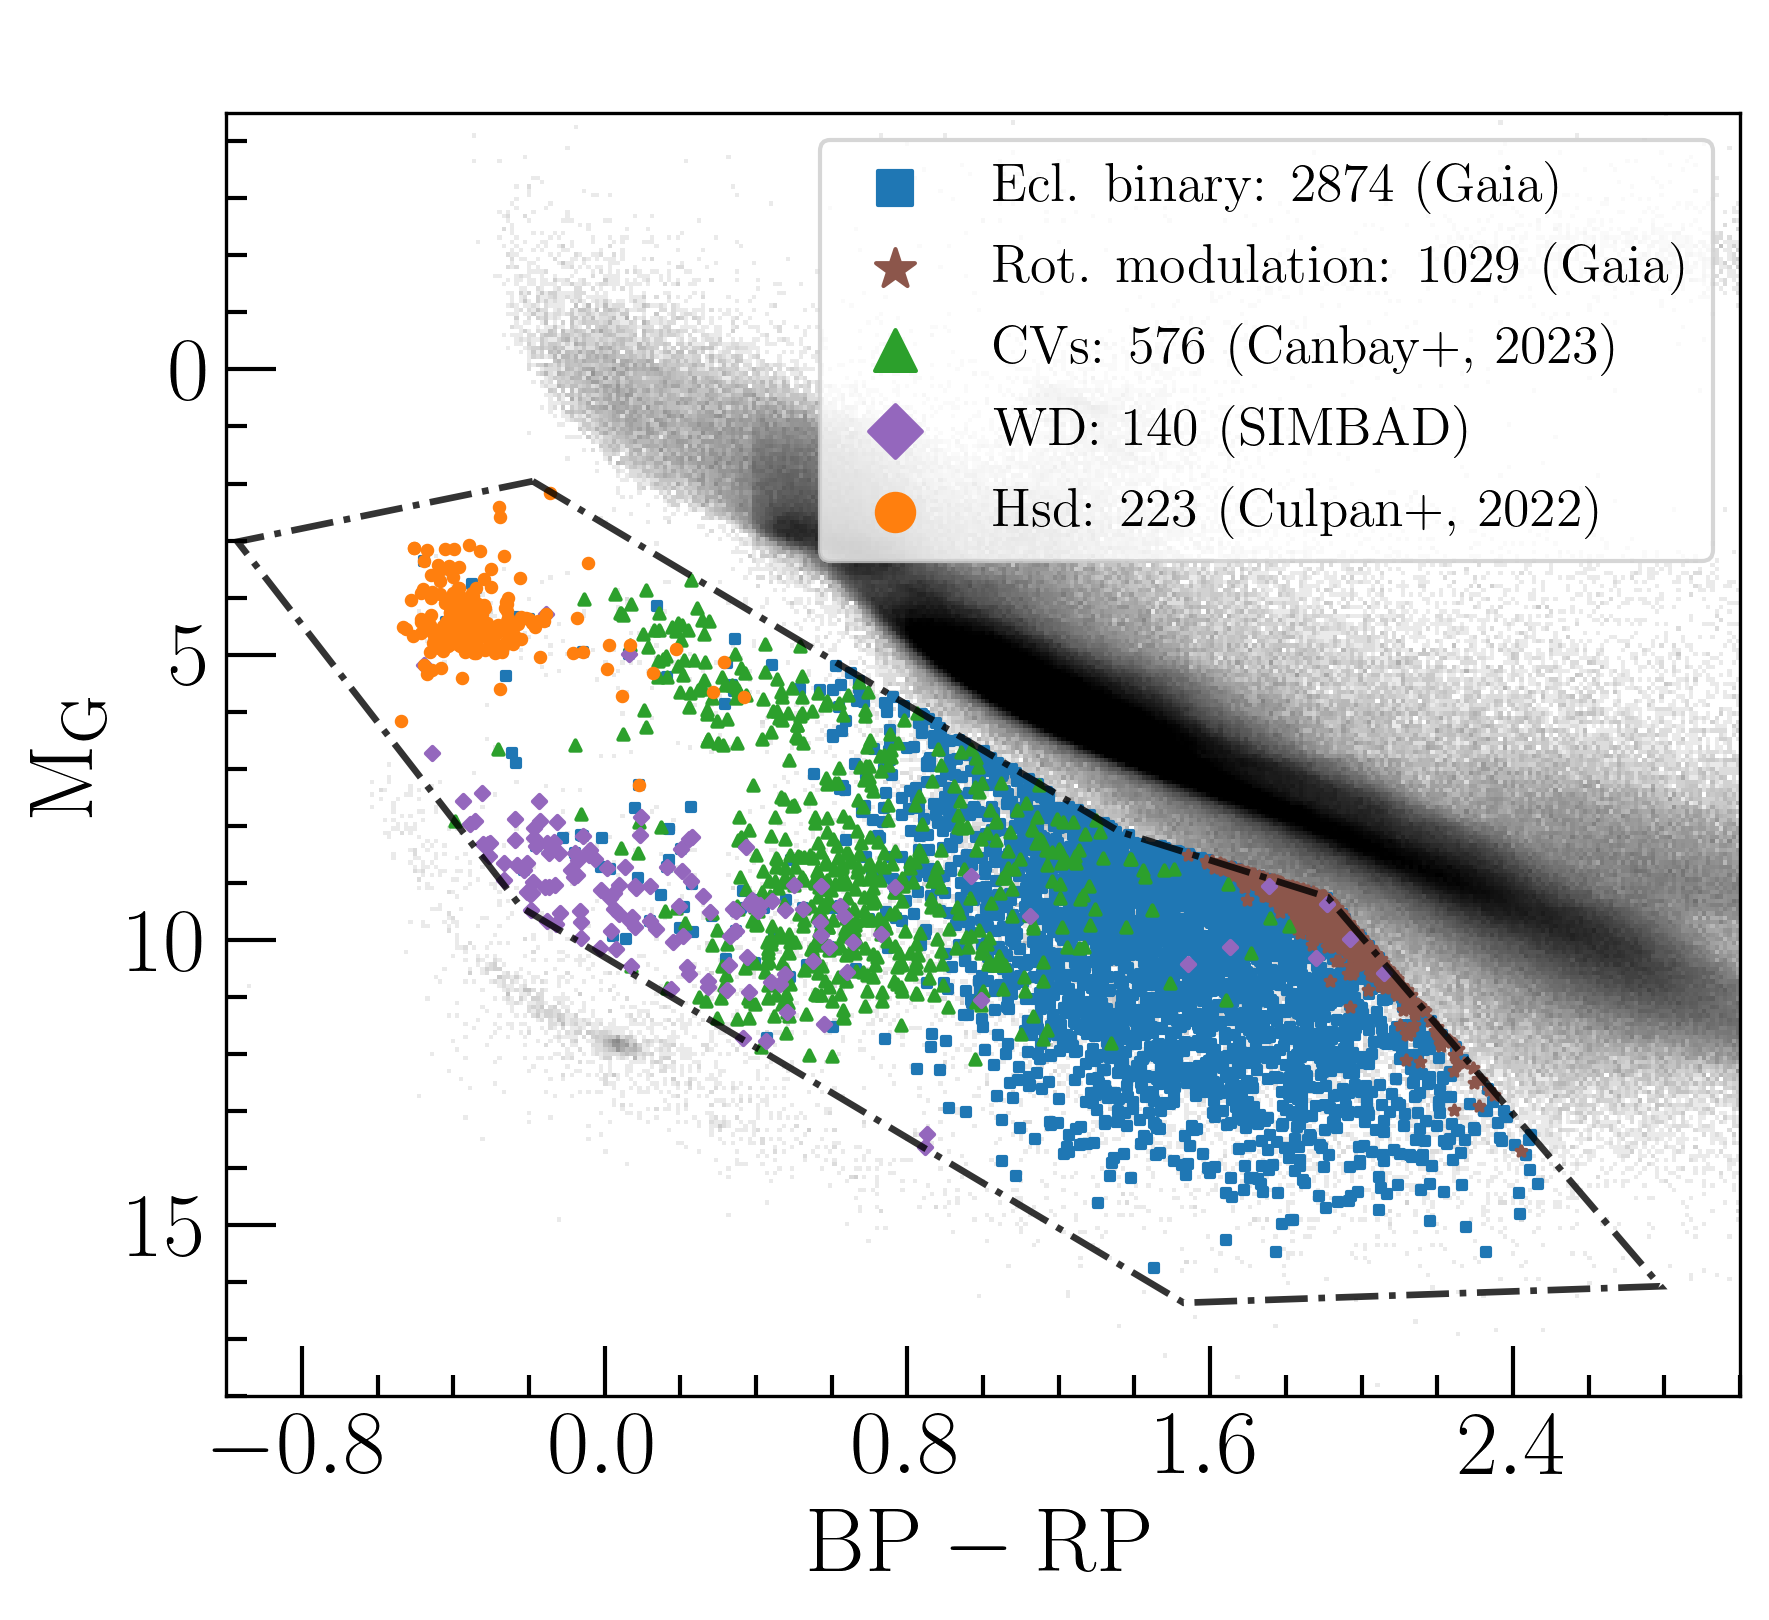

In [45]:
fig, ax = plt.subplots(figsize=(6, 5.5), dpi=300, subplot_kw={'projection': 'scatter_density'})

ax.set_facecolor("white")


norm = ImageNormalize(vmin=0., vmax=500, stretch=LogStretch())

ax.set_title(" ",fontsize=20)

density = ax.scatter_density(bprp, G_abs, norm=norm, cmap="Greys", downres_factor=1)




plt.scatter(ECL['bp_rp'],ECL['G_abs'],s=4,color=color[0],marker='s',label=f'Ecl. binary: {len(ECL)} (Gaia)')

# plt.scatter(eb2['bp_rp'].values,eb2['G_abs'].values,s=5,facecolor='white',edgecolor=color[1],marker='o',label='EB2')
# plt.scatter(eb3['bp_rp'].values,eb3['G_abs'].values,s=5,facecolor='white',edgecolor=color[2],marker='o',label='EB3')
# plt.scatter(eb1['bp_rp'].values,eb1['G_abs'].values,s=5,facecolor='white',edgecolor=color[3],marker='o',label='EB1')

# plt.scatter(rot1['bp_rp'].values,rot1['G_abs'].values,s=5,facecolor='white',edgecolor=color[6],marker='o',label='ROT2')
# plt.scatter(rot1['bp_rp'].values,rot1['G_abs'].values,s=5,facecolor='white',edgecolor=color[5],marker='o',label='ROT1')
plt.scatter(rot['bp_rp'].values,rot['G_abs'].values,s=6,color=color[5],marker='*',label=f'Rot. modulation: {len(rot)} (Gaia)')

plt.scatter(CVs['bp_rp'].values,CVs['G_abs'].values,s=6,color=color[2],marker='^',label=f'CVs: {len(CVs)} (Canbay+, 2023)')

# plt.scatter(CVs_nonmcvs['bp_rp'].values,CVs_nonmcvs['G_abs'].values,s=7,color=color[2],marker='^',label=f'non–mCVs: {len(CVs_nonmcvs)} (Lit.)')
# plt.scatter(CVs_DN['bp_rp'].values,CVs_DN['G_abs'].values,s=7,color=color[3],marker='>',label=f'CVs – DN: {len(CVs_DN)} (Lit.)')
# plt.scatter(CVs_mcvs['bp_rp'].values,CVs_mcvs['G_abs'].values,s=8,color=color[6],marker='>',facecolor='white',label=f'mCVs: {len(CVs_mcvs)} (Lit.)')

plt.scatter(WD['bp_rp'].values,WD['G_abs'].values,s=5,color=color[4],marker='D',label=f'WD: {len(WD)} (SIMBAD)')

plt.scatter(known_hsd_culpan['bp_rp'].values,known_hsd_culpan['G_abs'].values,s=5,color=color[1],marker='o',label=f'Hsd: {len(known_hsd_culpan)} (Culpan+, 2022)')
# plt.scatter(sdb_sub1['bp_rp'].values,sdb_sub1['G_abs'].values,s=6,color=color[7],marker='s',facecolor='white',label='Hsd sub 1')




verts = [
    (-0.19, 1.96),
    (1.36, 8.10),
    (1.91, 9.25),
    (2.79, 16.07),
    (1.53, 16.36),
    (-0.22, 9.43),
    (-0.97, 3.02)
]

verts.append(verts[0])
poly = Polygon(verts, closed=True, fill=False, edgecolor='black', linewidth=1.6,alpha=0.8,linestyle='-.')
plt.gca().add_patch(poly)



ax.set_xlabel(r"$B_{p} - R_{p}$ \textbf{(mag)}")  
ax.set_ylabel(r"$M_{G}$ \textbf{(mag)}")


ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
ax.yaxis.set_major_locator(ticker.MaxNLocator(5))



plt.minorticks_on()
plt.tick_params('both', length=12, width=1., which='major', direction='in')	
plt.tick_params('both', length=5, width=1, which='minor', direction='in')

ax.set_ylim([18,-4.5])
ax.set_xlim([-1.,3])
ax.set_xlabel(r'$\rm BP-RP$')
ax.set_ylabel(r'$\rm M_G$')

ax.legend(fontsize=13,markerscale=4)

plt.tight_layout()
plt.savefig('CMD_Gaia_ms_wd_per_objtype.pdf',format='pdf',bbox_inches="tight")



In [45]:
unique_labels=np.unique(data_targets['Cluster Name'].values)
color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
markers=['o','s','^','*','>','<','+','D','o','s','<','>']
labels=data_targets['Cluster Name'].values

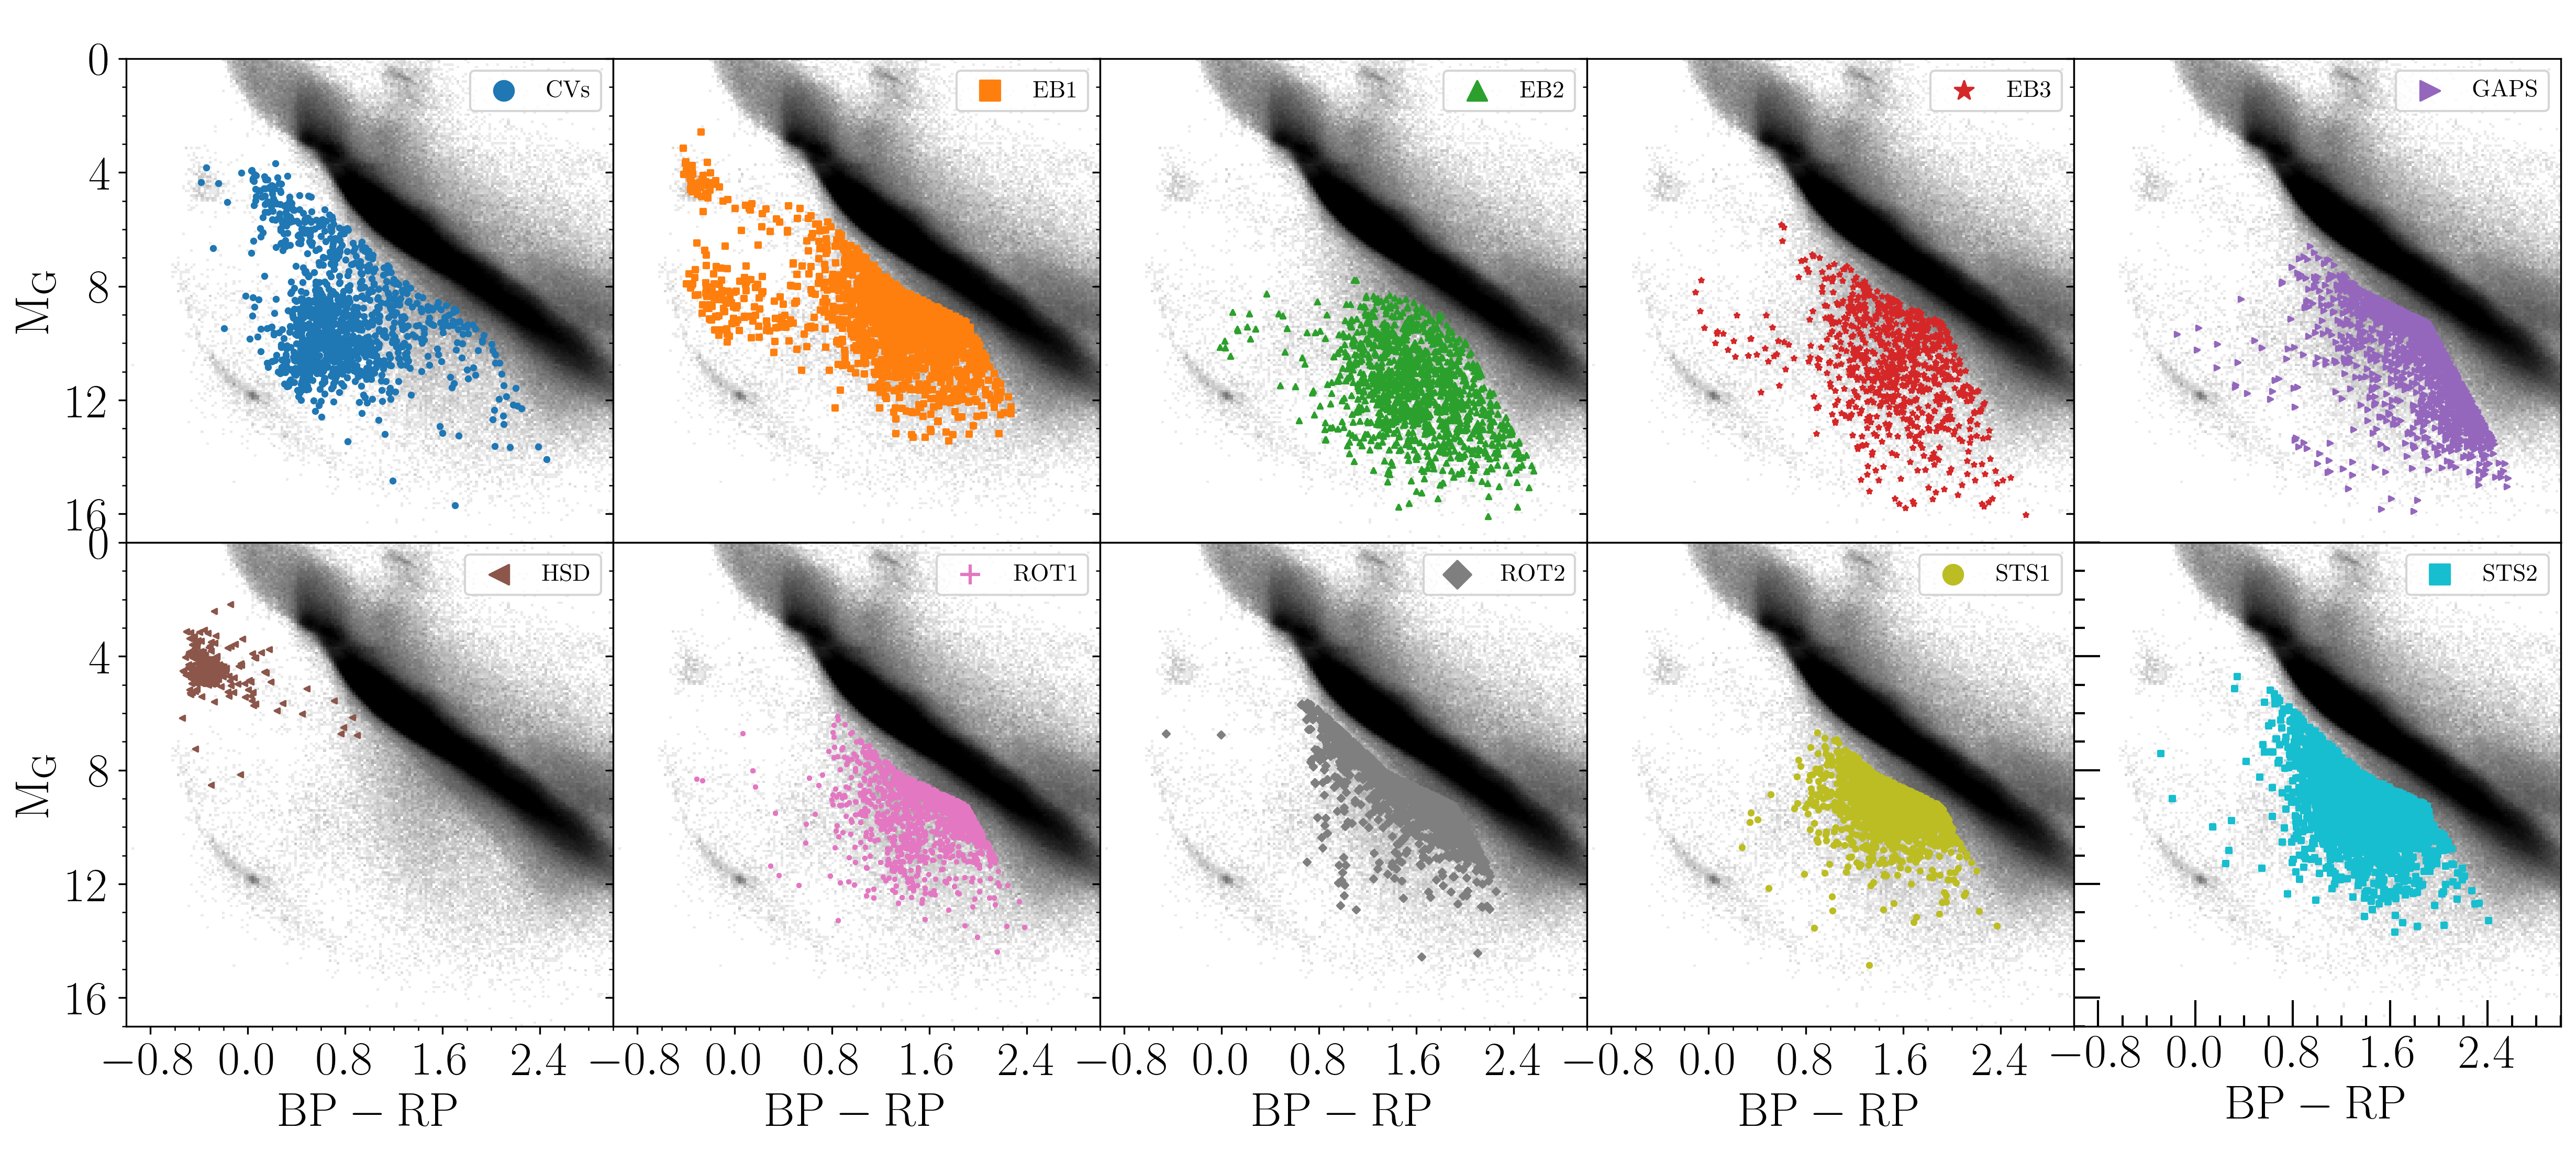

In [67]:
fig, axes = plt.subplots(ncols=5,nrows=2,figsize=(20, 8), dpi=300,sharex=True,sharey=True,subplot_kw={'projection': 'scatter_density'})
axes = axes.flatten()
for j in range(10):
    ax=axes[j]
    # ax.set_facecolor("white")
    
    
    norm = ImageNormalize(vmin=0., vmax=500, stretch=LogStretch())
    
    ax.set_title(" ",fontsize=20)
    
    density = ax.scatter_density(bprp, G_abs, norm=norm, cmap="Greys", downres_factor=1)
    
    i=0
    
    label=unique_labels[j]
    # for label in unique_labels:
    
    label_indices = labels == label
    ax.scatter(data_targets['bp_rp'].iloc[label_indices], data_targets['G_abs'].iloc[label_indices], 
                    label=label, 
                    c=color[j], 
                    s=5, marker=markers[j])

    if j>4:
        ax.set_xlabel(r'$\rm BP-RP$')
    if (j==0) | (j==5):
        ax.set_ylabel(r'$\rm M_G$')
    
    
    ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
    ax.yaxis.set_major_locator(ticker.MaxNLocator(5))
    
    
    
    plt.minorticks_on()
    plt.tick_params('both', length=12, width=1., which='major', direction='in')	
    plt.tick_params('both', length=5, width=1, which='minor', direction='in')
    
    ax.set_ylim([17,0])
    ax.set_xlim([-1.,3])
    # ax.set_xlabel(r'$\rm BP-RP$')
    # ax.set_ylabel(r'$\rm M_G$')
    
    ax.legend(fontsize=11,markerscale=4)

plt.subplots_adjust(wspace=0, hspace=0)
# plt.tight_layout()
plt.savefig('CMD_Gaia_ms_wd_per_cluster.pdf',format='pdf',bbox_inches="tight")



/Users/princy/opt/anaconda3/lib/python3.9/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/Users/princy/opt/anaconda3/lib/python3.9/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


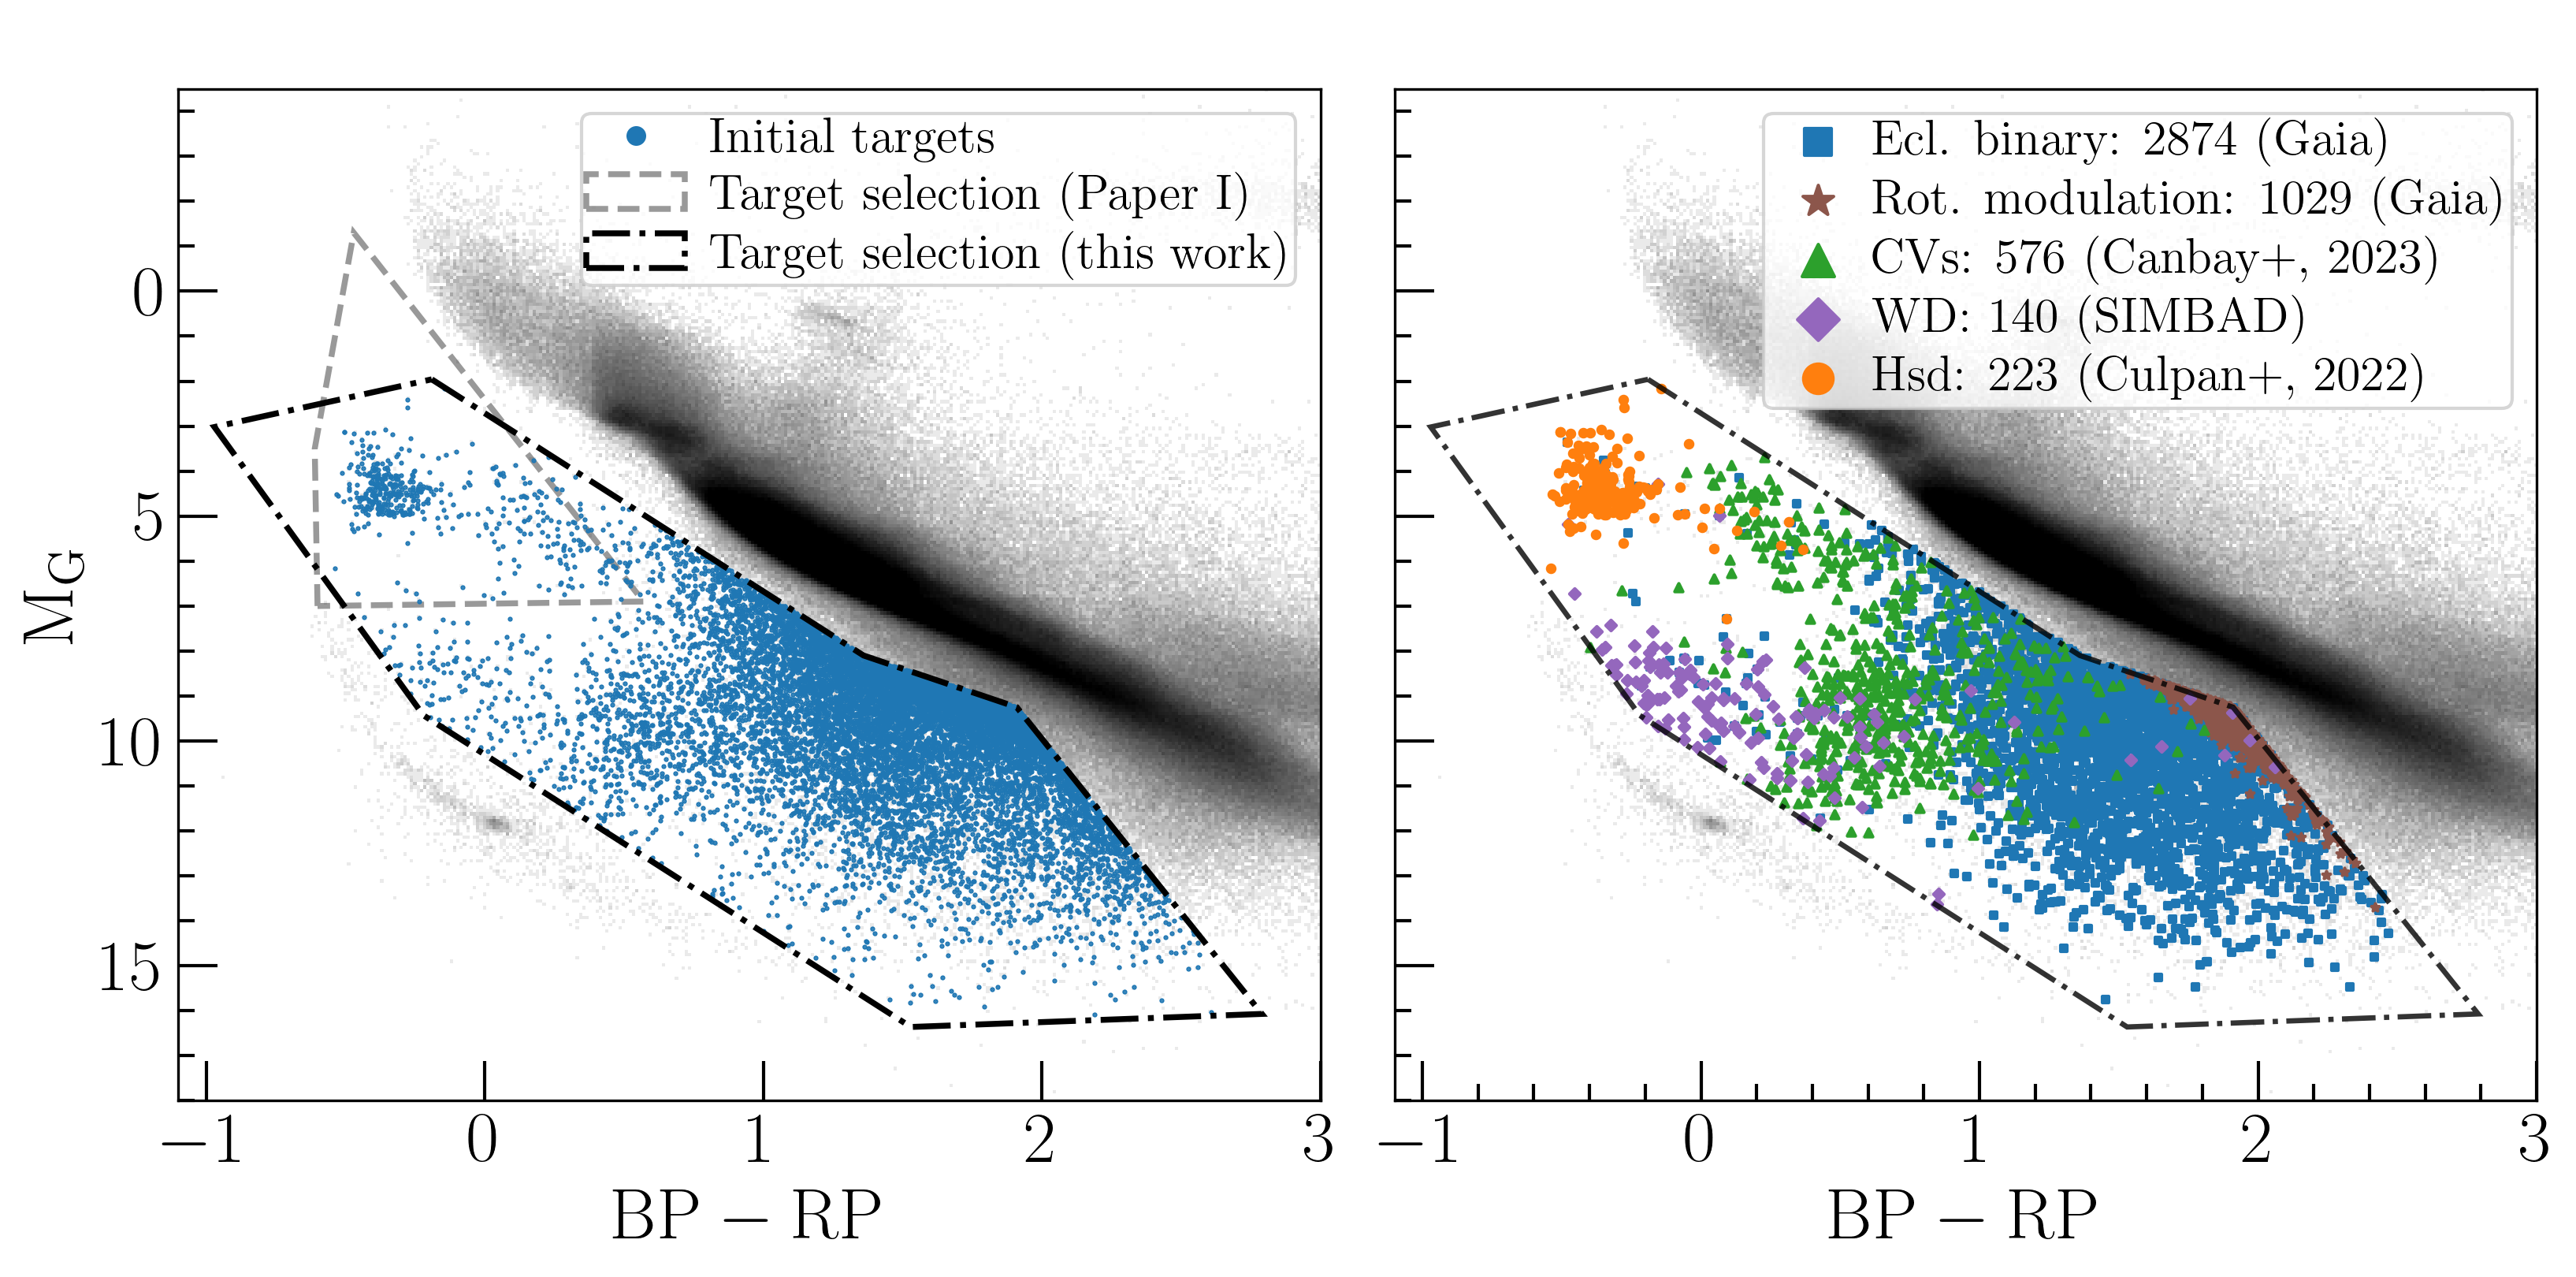

In [70]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(11, 5.5), dpi=300,sharey=True, subplot_kw={'projection': 'scatter_density'})

ax=axes[0]
ax.set_facecolor("white")

norm = ImageNormalize(vmin=0., vmax=500, stretch=LogStretch())


density = ax.scatter_density(bprp, G_abs, norm=norm, cmap="Greys", downres_factor=1)

# ax.plot(bprp[0], G_abs[0],'.',color='grey', ms=0.5,label='Gaia DR3 sources')
ax.plot(bprp_target, G_abs_target,'o', ms=0.5,label='Initial targets')
verts_2 = [
    (-0.6, 7),
    (-0.61, 3.5),
    (-0.47, -1.3),
    (0.57,6.9)
]
poly2 = Polygon(verts_2, closed=True, fill=False, edgecolor='black', linewidth=1.8,alpha=0.4,linestyle='--',label='Target selection (Paper I)')
ax.add_patch(poly2)


verts = [
    (-0.19, 1.96),
    (1.36, 8.10),
    (1.91, 9.25),
    (2.79, 16.07),
    (1.53, 16.36),
    (-0.22, 9.43),
    (-0.97, 3.02)
]

verts.append(verts[0])
poly = Polygon(verts, closed=True, fill=False, edgecolor='black', linewidth=1.8,alpha=1,linestyle='-.',label='Target selection (this work)',zorder=2)
ax.add_patch(poly)



ax.set_xlabel(r"$B_{p} - R_{p}$ \textbf{(mag)}")  
ax.set_ylabel(r"$M_{G}$ \textbf{(mag)}")






ax.set_ylim([18,-4.5])
ax.set_xlim([-1.1,3])
ax.set_xlabel(r'$\rm BP-RP$')
ax.set_ylabel(r'$\rm M_G$')

ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
ax.yaxis.set_major_locator(ticker.MaxNLocator(5))



plt.minorticks_on()

ax.tick_params('both', length=12, width=1., which='major', direction='in')	
ax.tick_params('both', length=5, width=1, which='minor', direction='in')


ax.legend(fontsize=15,markerscale=10,borderpad=0.1,labelspacing=0.2,handletextpad=0.5)



ax=axes[1]

ax.set_facecolor("white")


norm = ImageNormalize(vmin=0., vmax=500, stretch=LogStretch())

ax.set_title(" ",fontsize=20)

density = ax.scatter_density(bprp, G_abs, norm=norm, cmap="Greys", downres_factor=1)




plt.scatter(ECL['bp_rp'],ECL['G_abs'],s=4,color=color[0],marker='s',label=f'Ecl. binary: {len(ECL)} (Gaia)')

# plt.scatter(eb2['bp_rp'].values,eb2['G_abs'].values,s=5,facecolor='white',edgecolor=color[1],marker='o',label='EB2')
# plt.scatter(eb3['bp_rp'].values,eb3['G_abs'].values,s=5,facecolor='white',edgecolor=color[2],marker='o',label='EB3')
# plt.scatter(eb1['bp_rp'].values,eb1['G_abs'].values,s=5,facecolor='white',edgecolor=color[3],marker='o',label='EB1')

# plt.scatter(rot1['bp_rp'].values,rot1['G_abs'].values,s=5,facecolor='white',edgecolor=color[6],marker='o',label='ROT2')
# plt.scatter(rot1['bp_rp'].values,rot1['G_abs'].values,s=5,facecolor='white',edgecolor=color[5],marker='o',label='ROT1')
plt.scatter(rot['bp_rp'].values,rot['G_abs'].values,s=6,color=color[5],marker='*',label=f'Rot. modulation: {len(rot)} (Gaia)')

plt.scatter(CVs['bp_rp'].values,CVs['G_abs'].values,s=6,color=color[2],marker='^',label=f'CVs: {len(CVs)} (Canbay+, 2023)')

# plt.scatter(CVs_nonmcvs['bp_rp'].values,CVs_nonmcvs['G_abs'].values,s=7,color=color[2],marker='^',label=f'non–mCVs: {len(CVs_nonmcvs)} (Lit.)')
# plt.scatter(CVs_DN['bp_rp'].values,CVs_DN['G_abs'].values,s=7,color=color[3],marker='>',label=f'CVs – DN: {len(CVs_DN)} (Lit.)')
# plt.scatter(CVs_mcvs['bp_rp'].values,CVs_mcvs['G_abs'].values,s=8,color=color[6],marker='>',facecolor='white',label=f'mCVs: {len(CVs_mcvs)} (Lit.)')

plt.scatter(WD['bp_rp'].values,WD['G_abs'].values,s=5,color=color[4],marker='D',label=f'WD: {len(WD)} (SIMBAD)')

plt.scatter(known_hsd_culpan['bp_rp'].values,known_hsd_culpan['G_abs'].values,s=5,color=color[1],marker='o',label=f'Hsd: {len(known_hsd_culpan)} (Culpan+, 2022)')
# plt.scatter(sdb_sub1['bp_rp'].values,sdb_sub1['G_abs'].values,s=6,color=color[7],marker='s',facecolor='white',label='Hsd sub 1')




verts = [
    (-0.19, 1.96),
    (1.36, 8.10),
    (1.91, 9.25),
    (2.79, 16.07),
    (1.53, 16.36),
    (-0.22, 9.43),
    (-0.97, 3.02)
]

verts.append(verts[0])
poly = Polygon(verts, closed=True, fill=False, edgecolor='black', linewidth=1.6,alpha=0.8,linestyle='-.')
ax.add_patch(poly)





ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
ax.yaxis.set_major_locator(ticker.MaxNLocator(5))



plt.minorticks_on()
ax.tick_params('both', length=12, width=1., which='major', direction='in')	
ax.tick_params('both', length=5, width=1, which='minor', direction='in')

ax.set_ylim([18,-4.5])
ax.set_xlim([-1.1,3])
ax.set_xlabel(r'$\rm BP-RP$')
# ax.set_ylabel(r'$\rm M_G$')

ax.legend(fontsize=15,markerscale=4,borderpad=0.1,labelspacing=0.2,handletextpad=0.1)

plt.tight_layout()
plt.savefig('CMD_Gaia_ms_wd.pdf',format='pdf',bbox_inches="tight")
